# Машинное обучение и статистика
***

# scipy-stats
***

<img src="https://raw.githubusercontent.com/SharonNicG/52954-Machine-Learning-and-Statistics/main/Images/480px-SCIPY_2.svg.png" width="250"/>


<br>

**Импорт библиотек**

In [1]:
# For generating random variables/numerical arrays
import numpy as np

# For handling data in dataframes
import pandas as pd

# For plotting
import matplotlib.pyplot as plt

# For plotting
import seaborn as sns

# For stats and ANOVA
import scipy.stats as stats

# For stats and ANOVA
import scipy.stats as ss

# import the statsmodels
import statsmodels.api as sm

# creates a model from a formula and dataframe
from statsmodels.formula.api import ols

# Calculate all pairwise comparisons with Tukey Honestly Significant Difference (HSD) confidence intervals
# https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

# Collections, containers used for storing data
import collections as co

# Special functions for mathematical physics
import scipy.special as spec

# Anova table for one or more fitted linear models
from statsmodels.stats.anova import anova_lm

# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency

# shapiro-wilk test function to look for evidence of non-normality
from scipy.stats import shapiro

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Введение



***

## SciPy

SciPy [1] — бесплатная библиотека с открытым исходным кодом для выполнения научных вычислений с помощью Python [2]. Он построен на основе пакета Numpy для математических функций с массивами [3].
Запущенный в 2001 году пакет SciPy (Scientific Python) объединил в одном пакете несколько модулей научных и технических вычислений, которые ранее существовали как отдельные расширения Python. С тех пор пакет постоянно дорабатывался и включал в себя больше инструментов [4].
Библиотека содержит алгоритмы, выполняющие общие математические и научные вычислительные операции. Кроме того, он позволяет пользователям быстро и легко манипулировать данными и визуализировать их с помощью команд высокого уровня Python [5].

Функции сгруппированы в наборы инструментов/подмодули для различных целей:

<img src="https://raw.githubusercontent.com/SharonNicG/52954-Machine-Learning-and-Statistics/main/Images/SciPy_subpackages.png" width="500"/>

В этом ноутбуке основное внимание будет уделено модулю SciPy Stats [6], в частности тому, как его можно использовать для выполнения теста дисперсионного анализа (ANOVA). 

***

## scipy.stats

Модуль scipy.stats включает обширный набор функций для статистического анализа, в том числе [7]:
- Сводная статистика
- Статистика частоты
- Корреляционные функции
- Статистические тесты
- Квази-Монте-Карло
- Функции скрытой статистики
- Другие статистические функции
Scipy.stats предлагает возможность получить гораздо более глубокое понимание данных, чем Numpy. Хотя он не лишен ограничений, он работает вместе с другими библиотеками, такими как Pandas, scikit-learn и seaborn, предоставляя полный набор для статистической работы в экосистеме Python.

## ANOVA

Analysis of Variance (ANOVA) представляет собой статистический тест на значимые различия между двумя или более группами наблюдений [8]. 

Тест проверяет, имеет ли зависимая переменная линейную связь с одной или несколькими независимыми переменными [9]. Это завершается посредством проверки гипотез – нулевой и альтернативной гипотез [10]. Нулевая гипотеза заключается в том, что между представленными группами наблюдений нет существенных различий. То есть они все равны. Альтернативная гипотеза заключается в том, что выявлена ​​значительная разница. Обе гипотезы не могут быть справедливы одновременно. Тесты ANOVA направлены на определение того, что ПРАВДА, а что ЛОЖЬ.

При проверке гипотез ANOVA используются средние значения между переменными для анализа их дисперсии. Это рассчитывается с использованием теста F-статистики [11], который, по сути, проверяет вероятность аномальности дисперсии.

Здесь тест ANOVA будет продемонстрирован с использованием набора данных с информацией об изменениях в питании группы людей.

### Diet Dataset

<img src="https://raw.githubusercontent.com/SharonNicG/52954-Machine-Learning-and-Statistics/main/Images/david-b-townsend-fV3zTanbO80-unsplash.jpg" width="450"/>

---------------------------

Diet.csv содержит информацию о семидесяти восьми людях, соблюдавших три диеты. Имеется справочная информация, такая как возраст, пол и рост, а также потеря веса во время диеты (положительное значение означает, что они похудели). Целью исследования было выяснить, какая диета лучше всего подходит для похудения. Исследование также показало, что пол участника влиял на эффективность каждой диеты [12].

In [2]:
df = pd.read_csv('https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv')

Отобразим первые пять строк набора данных

In [3]:
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


In [4]:
print('This dataset contains {} rows'.format(df.size))

This dataset contains 546 rows


### Гипотезы

ANOVA начинается с гипотезы (исследовательского вопроса), позволяющей определить, что тестирует аналитик. 

Здесь возникает вопрос: как диета и пол влияют на потерю веса в рамках набора данных?


### Предположения

В основе анализа ANOVA (как одно-, так и двустороннего анализа) лежат определенные предположения. Наборы данных, которые не удовлетворяют или кажутся удовлетворяющими этим предположениям, не подходят для анализа ANOVA. 

Следующий шаг — проверить, соответствует ли выбранный набор данных основным предположениям тестирования ANOVA [13].
 
<ul>
  <li>Независимость</li>
    <ul>
        <li>Все образцы отбираются независимо друг от друга.</li>
        <li>Внутри каждой выборки наблюдения выбираются случайным образом и независимо друг от друга.</li>
    </ul>
  <li>Нормальность</li>
      <ul>
      <li>Каждая групповая выборка формируется из нормально распределенной совокупности.</li>
      <li>Однородность дисперсий.</li>
    </ul>
  <li>Все группы сравнения имеют общую дисперсию.</li>
</ul>

Начнем проверять эти предположения.

**Предположение 1: Зависимая переменная**

In [5]:
# Вычтите Weight6weeks из столбца pre.weight, чтобы найти новый столбец Weight_loss в датафрейме.
df["weight_loss"] = df['pre.weight'] - df["weight6weeks"]

In [6]:
# Use head function to display the first five rows
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_loss
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7


In [7]:
# определите зависимую переменную/вектор и покажите первые 5 значений
dependent = df['weight_loss']
dependent

0     0.0
1     0.0
2     3.8
3     6.0
4     0.7
     ... 
73    2.8
74    4.1
75    5.3
76    9.2
77    6.1
Name: weight_loss, Length: 78, dtype: float64

Отображение общей статистики о зависимой переменной:

In [8]:
# use describe() function to display the general statistics about the variable
dependent.describe()

count    78.000000
mean      3.844872
std       2.551478
min      -2.100000
25%       2.000000
50%       3.600000
75%       5.550000
max       9.200000
Name: weight_loss, dtype: float64

In [9]:
# See if there are any missing value in Dependant Variable column
# # isnull() finds the number of missing values and the sum total of missing values
df.weight_loss.isnull().sum()

0

Пропущенных значений не выявлено.

Отобразите гистограмму распределений из нового столбца Weight Loss:

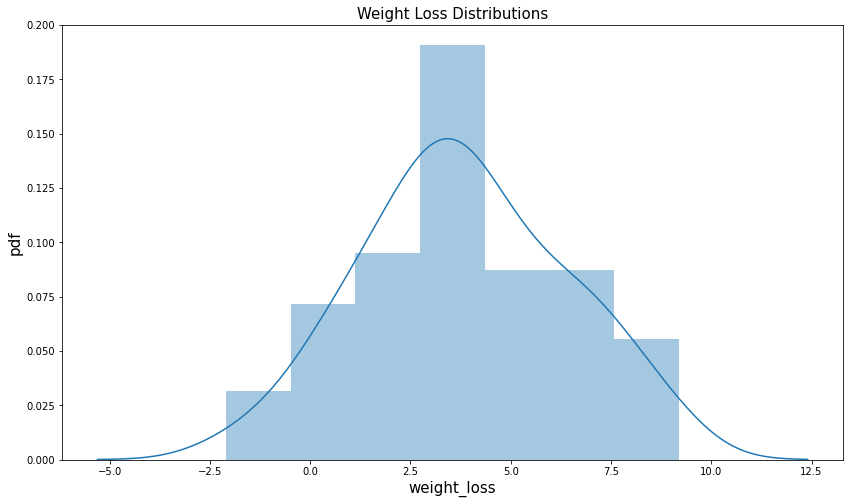

In [10]:
# set the size of the figure
plt.figure(figsize=(14,8))
# set the title of the figure
plt.title('Weight Loss Distributions', fontsize = 15)
# set the y label of the image
plt.ylabel('pdf' , fontsize = 15)
# set the x label of the image
plt.xlabel('weight_loss' , fontsize = 15)
# plot the distplot of weight_loss column
sns.distplot(df['weight_loss'],)
# show the graph
plt.show()

#### Предположение 2: Независимые переменные

**Независимая переменная 1**

In [11]:
# Independent Variable 1
independent_1 = df['Diet']
# use head function to display the first five rows
independent_1.head()

0    2
1    2
2    1
3    1
4    1
Name: Diet, dtype: int64

Отображение общей статистики о переменной idependent_1:

In [12]:
# use describe() function to display the general statistics about the vector
independent_1.describe()

count    78.000000
mean      2.038462
std       0.812920
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Diet, dtype: float64

Выведите уникальные значения для независимой переменной 1:

In [13]:
# use unique() function to displauy the number of unique values 
independent_1.unique()

array([2, 1, 3], dtype=int64)

Посмотрите, есть ли пропущенные значения в первом столбце Independant Variable:

In [14]:
# See if there are any missing value in Independant Variable column
# isnll() finds the number of missing values and the sum total of missing values
independent_1.isnull().sum()

0

Пропущенных значений не выявлено.

Отображение гистограммы распределения потери веса в зависимости от диеты

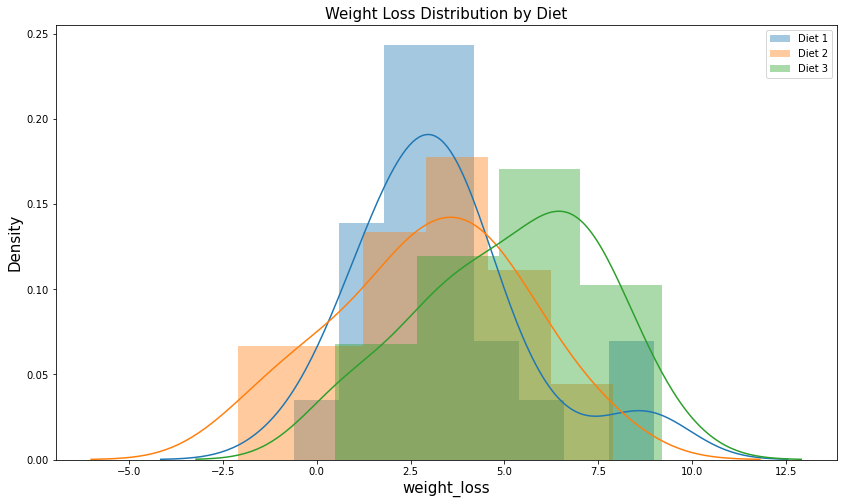

In [15]:
# set the size of the subplots figure
f, ax = plt.subplots(figsize=(14,8))
# display the distplot for Diet 1
sns.distplot(df[independent_1 == 1].weight_loss, ax=ax, label='Diet 1')
# display the distplot for Diet 2
sns.distplot(df[independent_1 == 2].weight_loss, ax=ax, label='Diet 2')
# display the distplot for Diet 13
sns.distplot(df[independent_1 == 3].weight_loss, ax=ax, label='Diet 3')
# set the title of the figure
plt.title('Weight Loss Distribution by Diet', fontsize = 15)
# set the y label of the image
plt.ylabel('Density' , fontsize = 15)
# set the x label of the image
plt.xlabel('weight_loss' , fontsize = 15)
# show the legend of the figure
plt.legend()
# show the graph
plt.show()

Сгруппируйте данные по первой независимой переменной (Diet) и покажите статистику (среднее, медиану, количество_ненулевых и стандартное отклонение) для Weight Loss:

In [16]:
df.groupby(independent_1).agg([np.mean, np.median, np.count_nonzero, np.std]).weight_loss

,mean,median,count_nonzero,std
Diet,,,,
1,3.300000,3.05,24.0,2.240148
2,3.025926,3.30,25.0,2.523367
3,5.148148,5.40,27.0,2.395568


**Независимая переменная 2**

In [17]:
# Independent Variable
independent_2 = df['gender']
# use head function to display the first five rows
independent_2.head()

0     
1     
2    0
3    0
4    0
Name: gender, dtype: object

Из приведенного выше снимка ясно, что некоторые точки данных отсутствуют. Мы проверим, сколько пропало, и решим, нужно ли предпринимать какие-либо действия.

In [18]:
# use describe() function to display the general statistics about the vector
independent_2.describe()

count     78
unique     3
top        0
freq      43
Name: gender, dtype: object

Напечатайте уникальные значения для второй независимой переменной:

In [19]:
independent_2.unique()

array([' ', '0', '1'], dtype=object)

Покажите, где находятся пропущенные значения во второй независимой переменной

In [20]:
df[independent_2 == ' ']

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_loss
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0


Из набора из 78 отсутствуют только две точки данных. Это незначительная доля отсутствующих значений, поэтому мы продолжим без каких-либо дальнейших действий.

Отобразим гистограмму Распределение потери веса по полу.

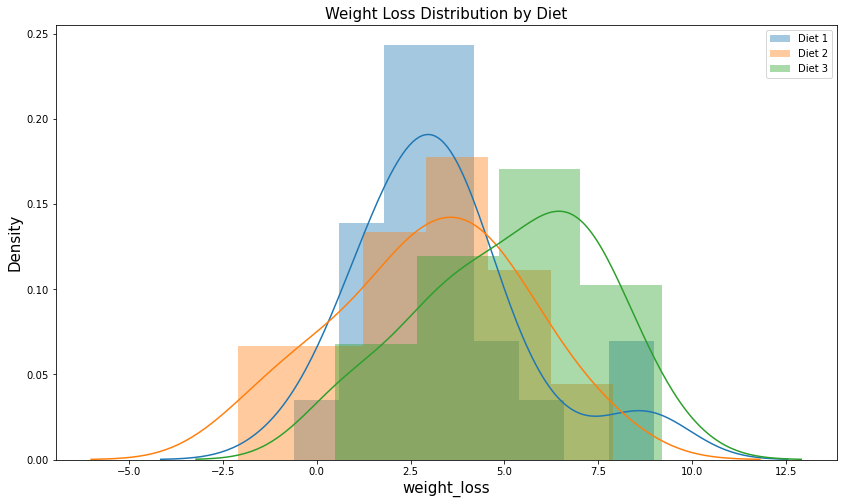

In [21]:
# set the size of the subplots figure
f, ax = plt.subplots(figsize=(14,8))
# display the distplot for Diet 1
sns.distplot(df[independent_1 == 1].weight_loss, ax=ax, label='Diet 1')
# display the distplot for Diet 2
sns.distplot(df[independent_1 == 2].weight_loss, ax=ax, label='Diet 2')
# display the distplot for Diet 13
sns.distplot(df[independent_1 == 3].weight_loss, ax=ax, label='Diet 3')
# set the title of the figure
plt.title('Weight Loss Distribution by Diet', fontsize = 15)
# set the y label of the image
plt.ylabel('Density' , fontsize = 15)
# set the x label of the image
plt.xlabel('weight_loss' , fontsize = 15)
# show the legend of the figure
plt.legend()
# show the graph
plt.show()

Сгруппируйте данные по второй независимой переменной (Diet) и покажите статистику (среднее, медиану, количество_ненулевых и стандартное отклонение) для Weight Loss:

In [22]:
df.groupby(independent_2).agg([np.mean, np.median, np.count_nonzero, np.std]).weight_loss

,mean,median,count_nonzero,std
gender,,,,
,0.000000,0.0,0.0,0.000000
0,3.893023,3.6,43.0,2.515892
1,4.015152,4.1,33.0,2.529837


#### Предположение 3: Независимость наблюдений

Диета вслепую назначалась людям независимо от пола [14] [15].

In [23]:
# use crosstab() function to find the cross tabulation of Diet and Gender columns
contigency= pd.crosstab(df['Diet'], df['gender'])  
contigency

gender,,0,1
Diet,,,
1,0,14,10
2,2,14,11
3,0,15,12


Критерий независимости хи-квадрат

In [24]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

0.41651218949783186


#### Предположение 4: выбросы

Можно заметить, что в столбцах данных «Diet 1» и «Diet 2» присутствует несколько выбросов.

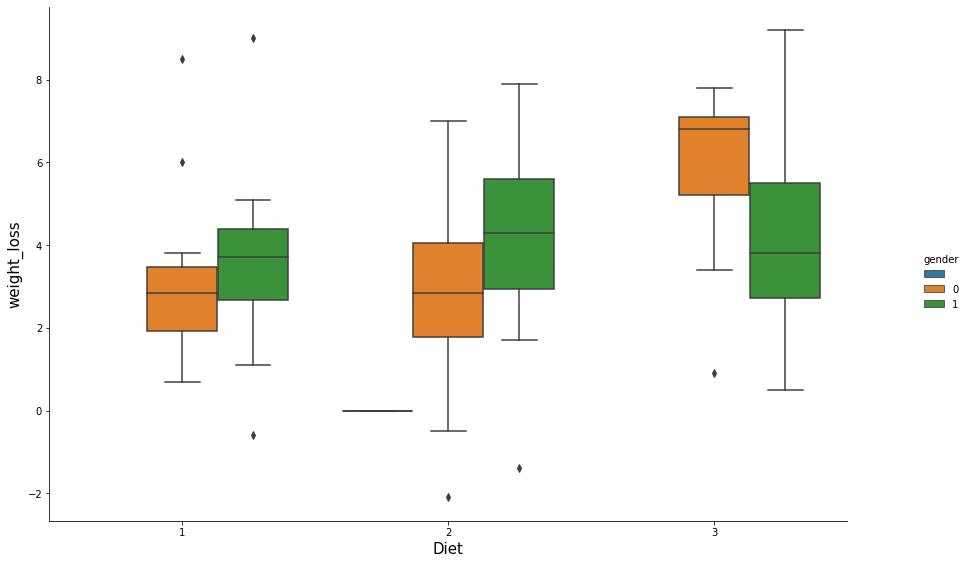

In [25]:
# Display the box plot between  different categories of diet and weight_loss w.r.t gender
g = sns.catplot(x="Diet", y="weight_loss", hue='gender', kind="box", data=df)
# set the figure width
g.fig.set_figwidth(14)
# set the figure height
g.fig.set_figheight(8)
# set the y label of the image
plt.ylabel('weight_loss' , fontsize = 15)
# set the x label of the image
plt.xlabel('Diet' , fontsize = 15)
# display the plot
plt.show()

### Предположение 5: нормальность распределения

**Тест Шапиро-Уилка**

In [26]:
# make the model for weight_loss using both Gender and Diet
model = ols('weight_loss ~ C(Diet) + C(gender) + C(Diet):C(gender)', df).fit()
# used shapiro function to fine the w and pvalue from model residuals
w, pvalue = stats.shapiro(model.resid)
# print  w and pvalue
print(w, pvalue)

0.975271463394165 0.13302740454673767


Все распределения зависимой переменной имеют значение p больше 0,05, что позволяет предположить, что она распределена нормально.

#### Предположение 6: Однородность дисперсий

Оцените равенство дисперсии между двумя разными выборками.

Сгруппируйте данные по (полу и диете) и покажите статистику (среднее, медиана, количество_ненулевых и стандартное отклонение) потери веса.

In [27]:
df.groupby(['gender', 'Diet']).agg([np.mean, np.median, np.count_nonzero, np.std]).weight_loss

mean  median  count_nonzero       std
gender Diet                                           
       2     0.000000    0.00            0.0  0.000000
0      1     3.050000    2.85           14.0  2.065001
       2     2.607143    2.85           14.0  2.288925
       3     5.880000    6.80           15.0  1.889520
1      1     3.650000    3.70           10.0  2.536073
       2     4.109091    4.30           11.0  2.525254
       3     4.233333    3.80           12.0  2.716058

### ANOVA Тест

**Однофакторный анализ ANOVA** 

Как описано выше, однофакторный дисперсионный анализ проверяет нулевую гипотезу. Тест будет применен к зависимым и независимым переменным, чтобы увидеть разницу между ними. Это завершается с использованием F-статистики и p-значения F-статистики. 

Значение p менее 0,05 считается статистически значимым и позволяет отвергнуть нулевую гипотезу. Таким образом, альтернативная гипотеза верна.
И наоборот, высокое значение F указывает на значительное значение p. [18]

Ниже односторонний дисперсионный анализ потери веса (зависимая переменная) и диеты (независимая переменная).

In [28]:
f_statistic, pvalue = stats.f_oneway(df['weight_loss'][df['Diet'] == 1], df['weight_loss'][df['Diet'] == 2], df['weight_loss'][df['Diet'] == 3])

print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA p-value: {pvalue}")

ANOVA F-statistic: 6.197447453165349
ANOVA p-value: 0.0032290142385893524


**Последующий анализ**

Хотя тест ANOVA оценивает степень статистически значимого различия переменных/групп, он не показывает нам, где обнаружены какие-либо различия.[19][20]

«Честно значимая разница Тьюки» или Tukey Honestly Significant Difference (HSD) [21] рассматривает статистически значимо разные средние значения переменных/групп и показывает нам, где находится разница.

In [29]:
# endog is the dependent variable (weight_loss).
# groups is the independent variable (Diet).
# alpha is the p-value threshold. 
# In this case anything below 0.05 will reject the null hypothesis.
tukey = pairwise_tukeyhsd(endog=df['weight_loss'],
                          groups=df['Diet'],
                          alpha=0.05)

# Print the Tukey table
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.2741    0.9 -1.8806 1.3325  False
     1      3   1.8481 0.0201  0.2416 3.4547   True
     2      3   2.1222 0.0048  0.5636 3.6808   True
---------------------------------------------------


В результирующей таблице показано, какая переменная/группа сравнивается (столбец «группа 1» и «группа 2») и является ли нулевая гипотеза ИСТИНОЙ или ЛОЖЬЮ для этого сравнения.

**Двухфакторный ANOVA**

Двухфакторный тест Anova пытается определить влияние двух или более независимых переменных на зависимую переменную.[22]

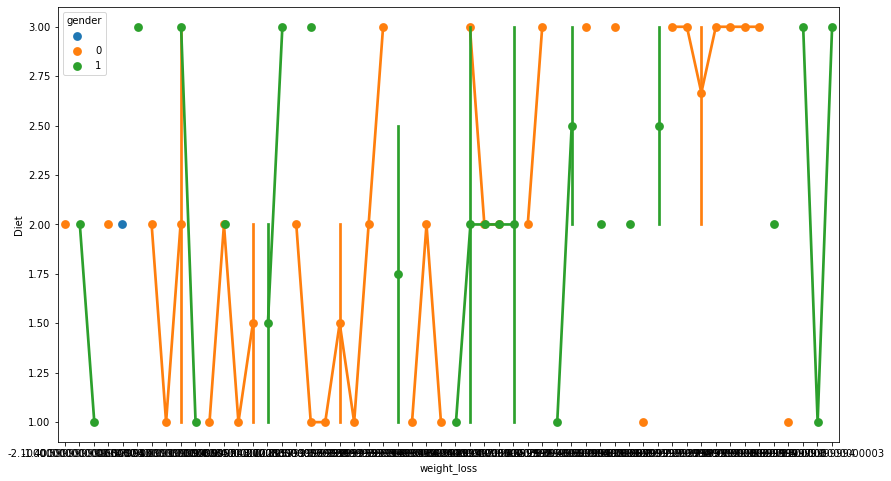

In [30]:
# Visualising relationship using seaborn's statistical plotting
# set the size of the figure
plt.figure(figsize=(14,8))
# https://seaborn.pydata.org/generated/seaborn.pointplot.html
ax = sns.pointplot(x='weight_loss', y='Diet', hue='gender', data=df, dodge=True, height=20)

ANOVA с двумя 'gender' и 'Diet' переменными относительно переменной 'weight_loss'.

In [31]:
# make the model for weight_loss using both Gender and Diet
model = ols('weight_loss ~ C(Diet) + C(gender) + C(Diet):C(gender)', df).fit()
# Find the anova table using anova_lm function
anova_table = anova_lm(model)
# Print the anova table
print(anova_table)

                     df      sum_sq    mean_sq         F    PR(>F)
C(Diet)             2.0   71.093689  35.546845  6.706434  0.002149
C(gender)           2.0   19.946148   9.973074  1.881567  0.159869
C(Diet):C(gender)   4.0   41.814932  10.453733  1.972250  0.108045
Residual           71.0  376.329043   5.300409       NaN       NaN


График распределения между потерей веса и диетой с учетом пола

<Figure size 1008x576 with 0 Axes>

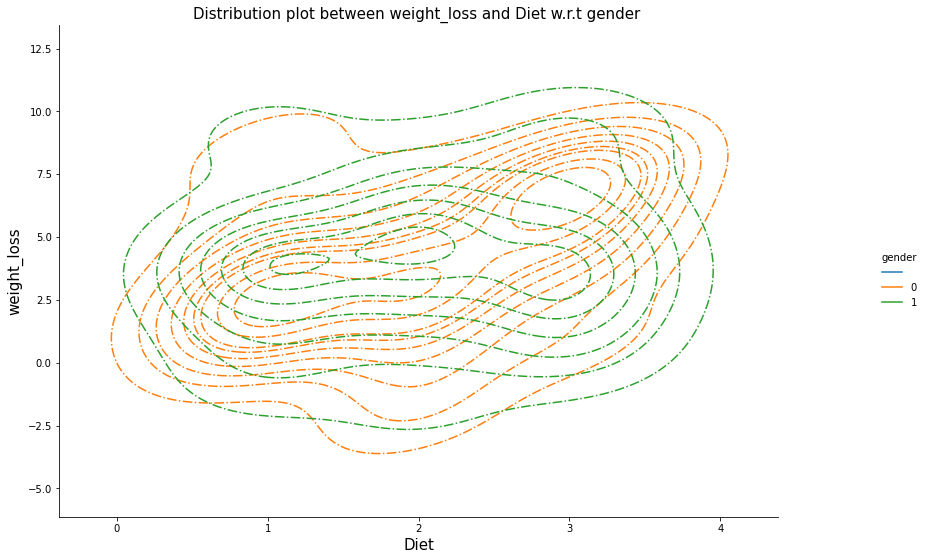

In [32]:
# set the size of the figure
plt.figure(figsize = (14,8))
g = sns.displot(x = "Diet", y = "weight_loss",  hue = "gender", kind = "kde", markers = '^',  linestyles = '-.',  data = df)
# set the figure width
g.fig.set_figwidth(14)
# set the figure height
g.fig.set_figheight(8)
# set the title of the figure
plt.title('Distribution plot between weight_loss and Diet w.r.t gender ', fontsize = 15)
# set the y label of the image
plt.ylabel('weight_loss' , fontsize = 15)
# set the x label of the image
plt.xlabel('Diet' , fontsize = 15)
# show the graph
plt.show()

***

## Заключение

Scipy.stats — инструментальная библиотека для Python. Это позволяет проводить углубленный статистический анализ с надежностью и повторяемостью предварительно созданной программы. В большей степени, чем scikit-learn, использование этой библиотеки требует понимания данных, с которыми вы работаете, а также тестов и мер, которые необходимо применить для достижения результата. Хотя у него есть известные ограничения, он работает вместе с другими библиотеками, которые их компенсируют, такими как matplotlib. В результате это ценный инструмент для любого анализа данных.

***

**Библиография**

1. https://scipy.org/
2. https://www.python.org/
3. https://numpy.org/
4. https://scipy.github.io/old-wiki/pages/History_of_SciPy
5. https://medium.com/edureka/scipy-tutorial-38723361ba4b
6. https://scipy.github.io/devdocs/tutorial/stats.html
7. https://scipy.github.io/devdocs/reference/stats.html
8. https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/
9. https://www.statsmodels.org/stable/user-guide.html#regression-and-linear-models
10. https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/
11. https://www.analyticsvidhya.com/blog/2021/01/an-introduction-to-hypothesis-testing/
12. https://www.sheffield.ac.uk/mash/statistics/datasets
13. https://www.real-statistics.com/one-way-analysis-of-variance-anova/assumptions-anova/
14. https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
15. https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d
16. https://www.reneshbedre.com/blog/anova.html
17. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
18. https://www.reneshbedre.com/blog/anova.html
19. https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_dunn/
20. https://stackoverflow.com/questions/16049552/what-statistics-module-for-python-supports-one-way-anova-with-post-hoc-tests-tu
21. https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html
22. https://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/

**References**

- https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php


***
# Конец